# Customer Segmentation Analysis

## Business Understanding

### Problem Statement

Businesses often struggle to understand the diverse needs and behaviors of their customer base. A one-size-fits-all approach to marketing and customer engagement can lead to suboptimal results. By segmenting customers based on their demographic and behavioral data, businesses can tailor their marketing efforts to meet the specific needs of each segment, thereby enhancing customer satisfaction and boosting sales.

## Main Objective

To analyze customer data to identify distinct segments within the customer base. This segmentation will help in developing targeted marketing strategies, improving customer satisfaction, and increasing sales.

#### Key Objectives

- Analyze the demographic and behavioral traits of each segment to understand their preferences and needs.

- Create customized marketing and engagement strategies for each segment to improve customer satisfaction and increase sales.

- Describe each segment based on key demographic and behavioral attributes.

- Provide recommendations for targeted marketing and customer engagement strategies.

## Data Understanding

This dataset was extracted from Kaggle


- Dataset Size: 1000 rows, 9 columns

Column Types:

- Numeric: id, age, income, spending_score, membership_years, purchase_frequency, last_purchase_amount

- Categorical: gender, preferred_category

- id: Unique identifier for each customer.
- age: Age of the customer.
- gender: Gender of the customer (Male, Female, Other).
- income: Annual income of the customer (in USD).
- spending_score: Spending score (1-100), indicating the customer's spending behavior and loyalty.
- membership_years: Number of years the customer has been a member.
- purchase_frequency: Number of purchases made by the customer in the last year.
- preferred_category: Preferred shopping category (Electronics, Clothing, Groceries, Home & Garden, Sports).
- last_purchase_amount: Amount spent by the customer on their last purchase (in USD).

## Data Preparation

In [32]:
#import necessary libraries
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('customer_segmentation_data.csv')
#first five rows
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [3]:
#last 5 rows
df.tail()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
995,996,57,Male,112170,57,6,1,Clothing,313.64
996,997,23,Other,65337,76,10,23,Groceries,632.83
997,998,23,Male,113097,40,5,42,Sports,75.09
998,999,22,Female,113695,63,7,44,Electronics,505.16
999,1000,36,Female,90420,7,2,31,Groceries,669.26


In [4]:
#number of rows and columns
df.shape

(1000, 9)

In [5]:
#information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [6]:
#statistics on the dataset
df.describe()

,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,288.819436,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,1.000000,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,250.750000,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,500.500000,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,750.250000,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,1000.000000,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


## Data Cleaning

In [7]:
#Check for missing Values
missing_values = df.isnull().sum()
print(missing_values)

id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64


In [8]:
# check for duplicate values
df.duplicated().sum()

0

Obsevation

- There are no duplicates or missing values in our dataset.

### Feature Engineering

In [9]:
df_encoded = pd.get_dummies(df, columns=['gender', 'preferred_category'], drop_first=True)


In [10]:
#display the first first rows
df_encoded.head()

,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Male,gender_Other,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports
0,1,38,99342,90,3,24,113.53,False,False,False,True,False,False
1,2,21,78852,60,2,42,41.93,False,False,False,False,False,True
2,3,60,126573,30,2,28,424.36,False,False,False,False,False,False
3,4,40,47099,74,9,5,991.93,False,True,False,False,True,False
4,5,65,140621,21,3,25,347.08,False,False,True,False,False,False


##  Exploratory Data Analysis(EDA)

#### - Univariate Analysis

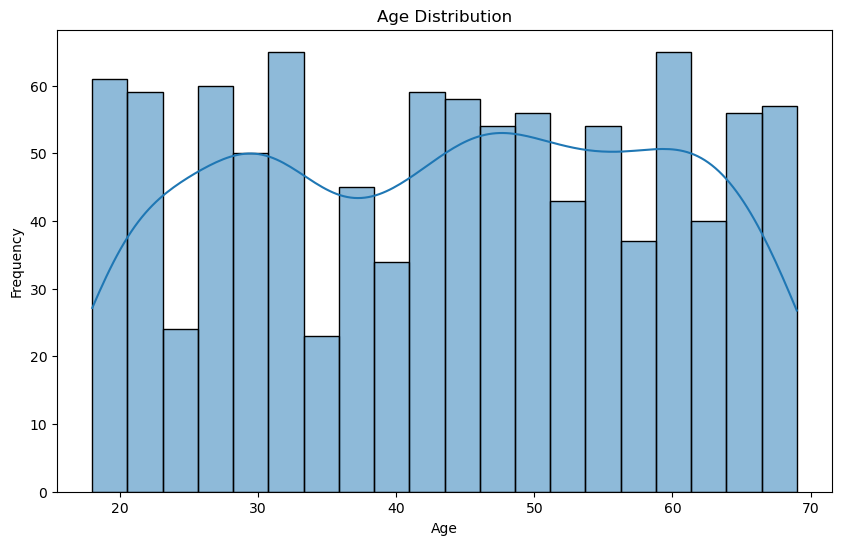

In [11]:
#Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


- Most customers are aged between 30 and 60 years, with a peak around 45 years. There is a smaller number of younger and older customers.

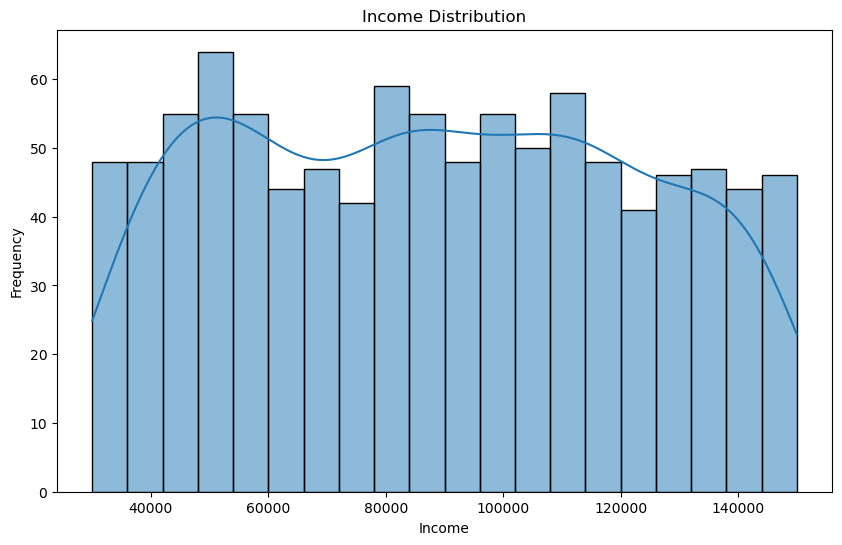

In [12]:
#Income Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['income'], bins=20, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


- Customer income is widely distributed, with a significant number of customers earning between $ 50,000  and  $ 120,000 annually.
There are fewer customers in the lower and higher income ranges.

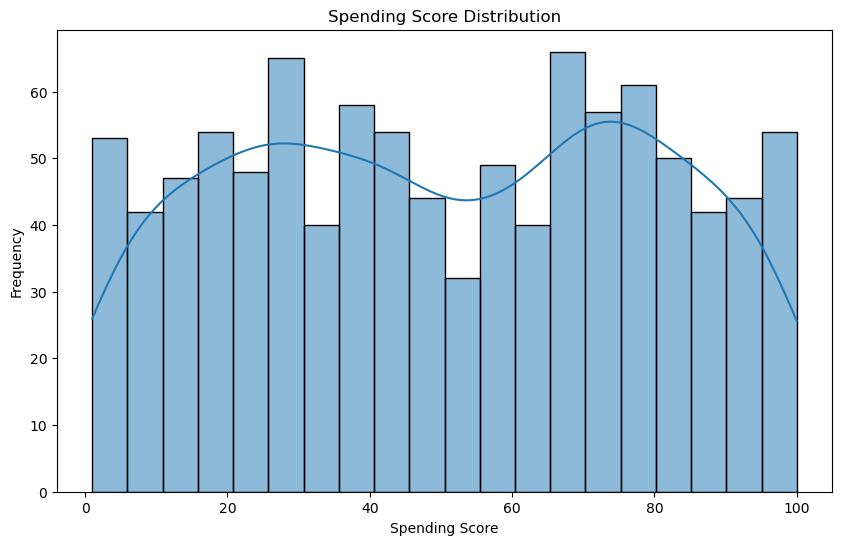

In [13]:
## Spending Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['spending_score'], bins=20, kde=True)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.show()

- Spending scores are fairly evenly distributed, but there is a noticeable concentration around the 50-75 range, indicating a significant portion of customers with moderate to high spending behavior.

#### -Bivariate Analysis

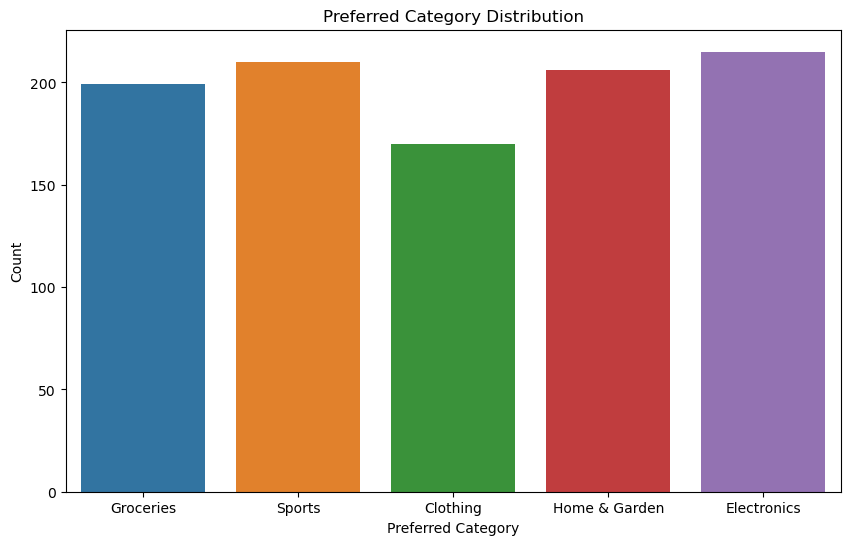

In [14]:
# Segmentation Insights
## Preferred Category Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='preferred_category', data=df)
plt.title('Preferred Category Distribution')
plt.xlabel('Preferred Category')
plt.ylabel('Count')
plt.show()

- Sports is the most preferred category, followed by Electronics,Groceries Clothing, and Home & Garden. This distribution indicates that marketing strategies should prioritize the Sports category for maximum impact, followed by Electronics and Groceries.

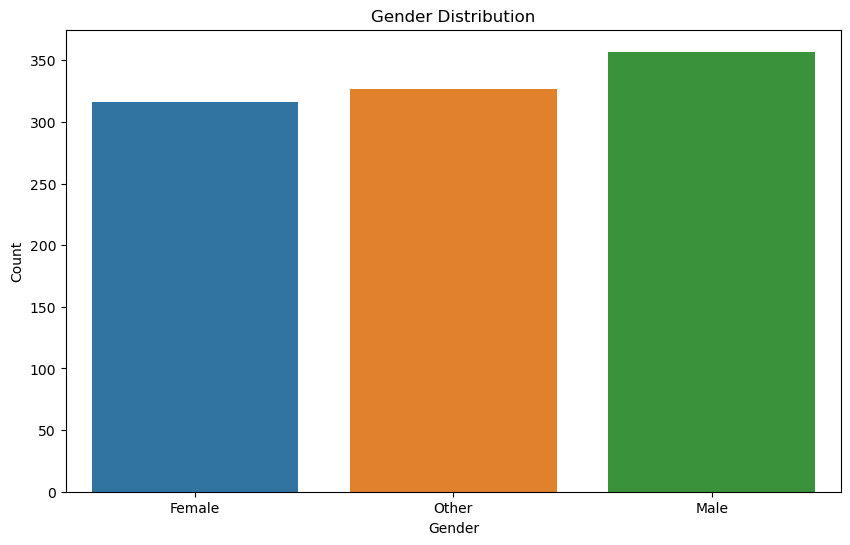

In [15]:
## Gender Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

- The dataset has a higher number of male customers, followed by those identified as 'Other', and then female customers. This indicates that marketing messages should be primarily tailored to appeal to male customers, with additional considerations for the 'Other' and female groups.

In [16]:
# Selecting relevant features for clustering
features = ['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded[features])

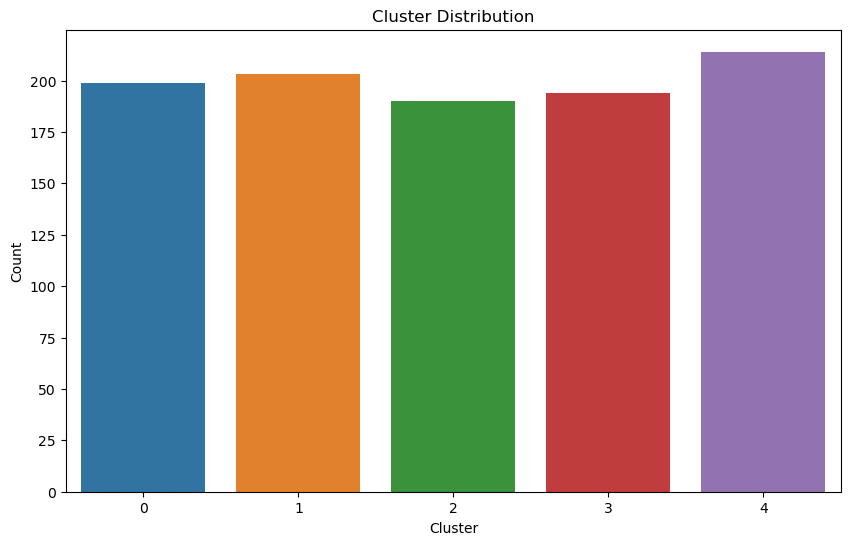

In [17]:
# Choosing the number of clusters (K)
k = 5  #start with 5 clusters based on this analysis

# Applying K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
df_encoded['cluster'] = kmeans.fit_predict(df_scaled)

# Checking cluster distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=df_encoded)
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

- Observation: Cluster 4 has the most customers, while Clusters 0, 1, 2, and 3 have fewer.

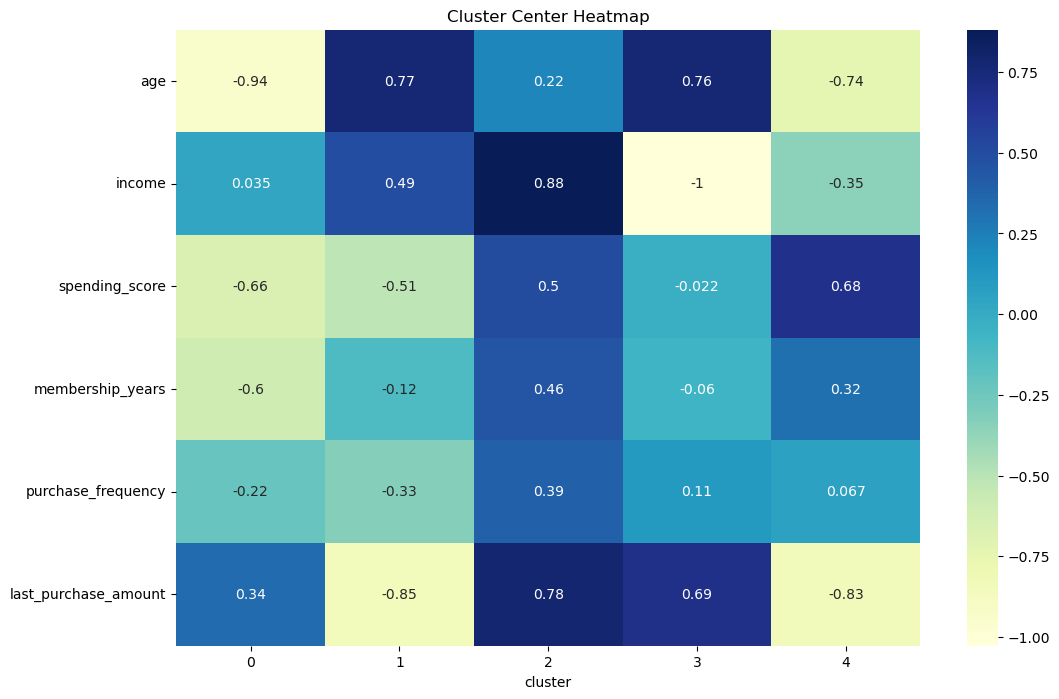

In [18]:
# Visualizing cluster profiles
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features)
cluster_centers['cluster'] = range(0, k)
cluster_centers.set_index('cluster', inplace=True)

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_centers.T, annot=True, cmap='YlGnBu')
plt.title('Cluster Center Heatmap')
plt.show()

# Explore cluster characteristics
cluster_summary = df_encoded.groupby('cluster')[features].mean()

#### Cluster Profiles:
- Cluster 0: Younger, moderate income, low spending.
- Cluster 1: Older, moderate income, moderate spending.
- Cluster 2: Middle-aged, high income, high spending, loyal.
- Cluster 3: Older, low income, moderate spending.
- Cluster 4: Younger, low income, high spending.

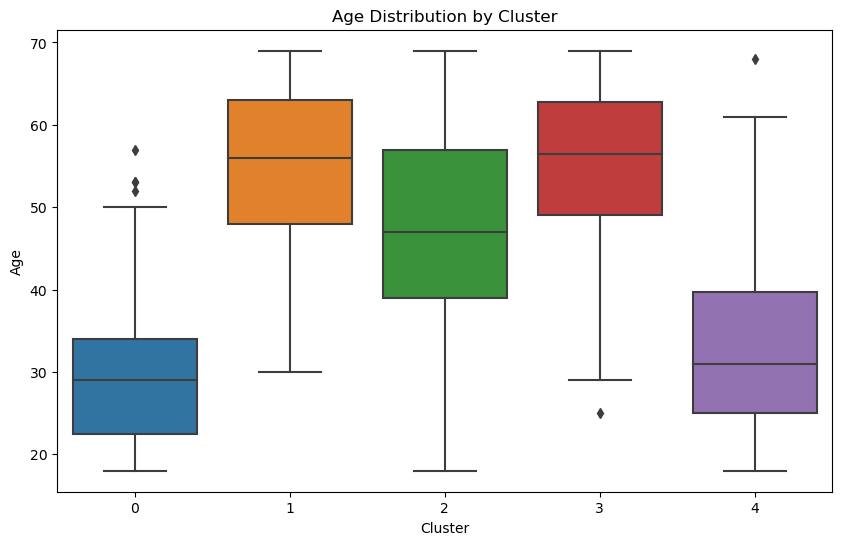

In [19]:
# Visualize the distribution of age within each cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='age', data=df_encoded)
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

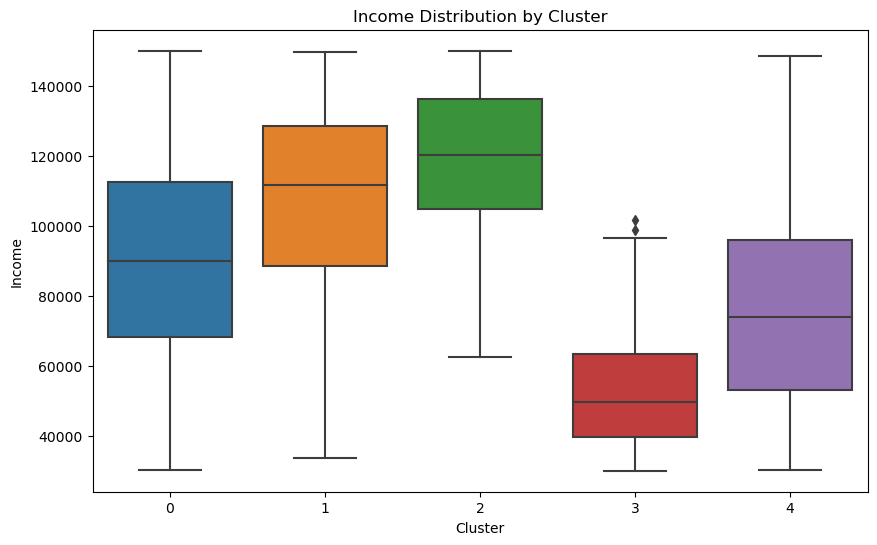

In [20]:
# Visualize the distribution of income within each cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='income', data=df_encoded)
plt.title('Income Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.show()

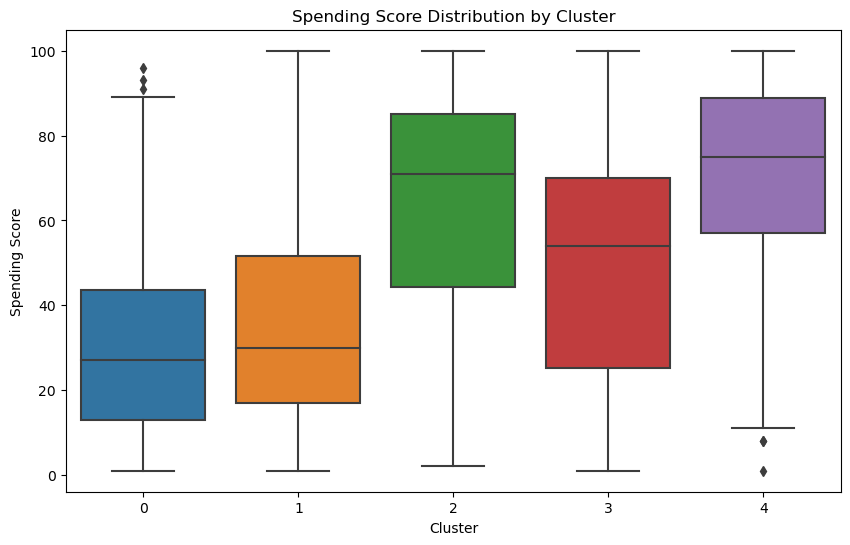

In [21]:
# Visualize the distribution of spending score within each cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='spending_score', data=df_encoded)
plt.title('Spending Score Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Spending Score')
plt.show()

##### Cluster 0:
- Age Range: Mainly younger customers.
- Income Range: Moderate.
- Spending Score: Low.
- Recommendations: Focus on budget-friendly promotions and introductory offers to encourage initial purchases and build brand loyalty among younger, price-sensitive customers.

##### Cluster 1:
- Age Range: Older customers.
- Income Range: Moderate.
- Spending Score: Moderate.
- Recommendations: Emphasize quality and personalized service to cater to the preferences of affluent middle-aged customers. Offer products and services that align with their discerning tastes and emphasize value and exclusivity to maintain their loyalty.

##### Cluster 2:
- Age Range: Middle-aged customers.
- Income Range: High.
- Spending Score: High.
- Recommendations: Focus on premium offerings and personalized experiences to maintain high levels of engagement and spending. Implement loyalty programs that reward frequent purchases and provide exclusive benefits.


##### Cluster 3:
- Age Range: Older customers.
- Income Range: Low.
- Spending Score: Moderate.
- Recommendations: Offer cost-effective solutions and discounts to attract price-conscious older customers. Emphasize product reliability and longevity to build trust and encourage repeat purchases.

##### Cluster 4:
- Age Range: Mainly younger customers.
- Income Range: Moderate.
- Spending Score: High.
- Recommendations: Leverage digital marketing channels and personalized recommendations to capitalize on the spending potential of tech-savvy younger customers. Focus on innovative products and seamless customer experiences to maintain engagement and loyalty.

#### DBSCAN Clustering
- Why DBSCAN?

Using DBSCAN in this Customer Segmentation Analysis because it effectively handles noise and outliers, detects clusters of arbitrary shapes, and doesn't require specifying the number of clusters in advance. This makes it ideal for uncovering natural groupings and complex patterns in customer data, leading to more precise and actionable marketing strategies.

In [28]:
# Define the best parameters found
best_eps = 1.5
best_min_samples = 9

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Calculate the silhouette score
silhouette_avg = silhouette_score(df_scaled, dbscan_labels)

print(f'Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best silhouette score: {silhouette_avg}')


Best eps: 1.5, Best min_samples: 9, Best silhouette score: 0.18965676950844162


- The best silhouette score obtained was 0.189, indicating moderate cluster quality.

## Recommendations:
- Cluster 0: Focus on budget-friendly promotions and introductory offers to encourage purchases among younger, price-sensitive customers.
- Cluster 1: Emphasize quality and personalized service for older, moderate-income customers.
- Cluster 2: Offer premium products and personalized experiences to maintain high engagement and spending.
- Cluster 3: Provide cost-effective solutions and discounts to attract price-conscious older customers.
- Cluster 4: Utilize digital marketing channels and innovative products to engage tech-savvy younger customers.

## Conclusion
The segmentation analysis provided valuable insights into the diverse customer base. By tailoring marketing strategies to each segment's specific needs and preferences, businesses can enhance customer satisfaction and boost sales. Future work could involve continuous monitoring and updating of customer segments as new data becomes available, ensuring that marketing strategies remain relevant and effective.